#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 5
### Due: Monday, Feb 28th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Feb 28th.

---

## Problem 1

We have seen that for some distributions, we can solve the for the maximum liklehood analytically.

a) Solve analytically for the maximum liklihood of the Poisson distribution.

b) Solve analytically for the maximum likelihood for a Gaussian where the uncertainties are *hetero*scedastic.

Either write your solution as Markdown/Latex below, or paste in a scanned image of your handwritten solution.

### Solution

## POISSON

Given that the pdf of a Poisson distribution is like this: 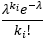 

We then need to find the product of the individual probabilities, so we have something like this: 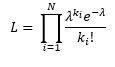

Now we can take the natural log of each side: 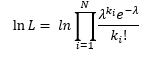

Now we take the derivative: 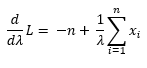

Now we set it equal to zero to maximize L, and find the MLE: 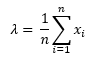


## GAUSSIAN (Heteroscedastic Uncertainties)

Following the outline from lecture for the homoscedastic function, we can find the heteroscedastic MLE by manipulating the error term to find: 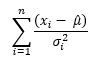

(I'm not totally confident that this is valid)

## Problem 2

In the lecture we have seen how data sets influenced by outliers can be fitted better when using the Huber loss function.
Another way to deal with outliers is called Winsorizing or winsorization and implemented in scipy (from scipy.stats.mstats import winsorize).
a) using the scipy online documentation, look up what this method means and write a small Python example.
b try to fit the data from our lecture, section "Fitting A Straight Line To Data", after applying Winsorizing, and describe 



### Solution



Optimization terminated successfully.
         Current function value: 18.680770
         Iterations: 53
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 289.963723
         Iterations: 70
         Function evaluations: 133
Optimization terminated successfully.
         Current function value: 81.941044
         Iterations: 66
         Function evaluations: 128


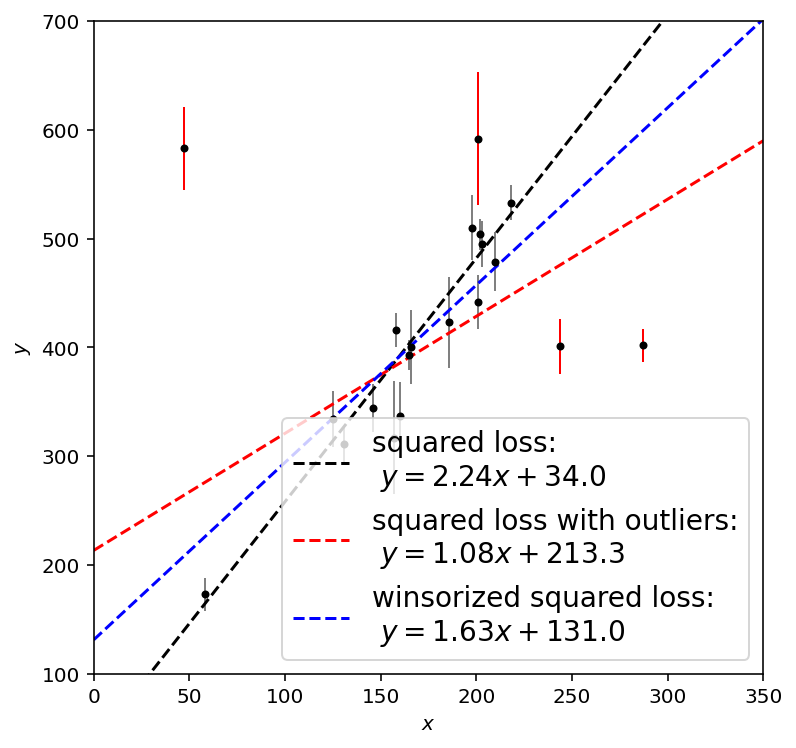

In [19]:
# Grabbing everything from lecture first, winsorizing code is near the bottom of this cell (commented)

# Execute this cell
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats.mstats import winsorize
from scipy import optimize
from astroML import stats as astroMLstats
from astroML.datasets import fetch_hogg2010test

#------------------------------------------------------------
# Get data from AstroML: this includes outliers
data = fetch_hogg2010test()
x = data['x'] # x data
y = data['y'] # y data
dy = data['sigma_y'] # uncertainties on y data

# Define the standard squared-loss function.
# This is just another name for chi^2
def squared_loss(m, b, x, y, dy):
    y_fit = m * x + b
    return np.sum(((y - y_fit) / dy) ** 2, -1)

# define a lambda function that defines the sum of squared errors.

# let's first exclude the outliers by chopping off the first 4 points.
f_squared = lambda beta: squared_loss(beta[0], beta[1], 
                                      x=x[4:], y=y[4:], 
                                      dy=dy[4:])

#------------------------------------------------------------
# compute the maximum likelihood 
beta0 = (1, 30) # initial guess for a and b
beta_squared = optimize.fmin(f_squared, beta0)

# we include the outliers
f_squared_outlier = lambda beta_outlier: squared_loss(beta_outlier[0], 
                                                      beta_outlier[1], 
                                                      x=x, y=y, dy=dy)

#------------------------------------------------------------
# compute the maximum likelihood 
beta0 = (1, 30) # initial guess for a and b
beta_squared_outlier = optimize.fmin(f_squared_outlier, beta0)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# plot the data without outliers in gray
ax.errorbar(x[4:], y[4:], dy[4:], 
            fmt='.k', lw=1, ecolor='gray')
# plot the outliers in red
ax.errorbar(x[0:4], y[0:4], dy[0:4], 
            fmt='.k', lw=1, ecolor='red')

x_fit = np.linspace(0, 350, 10)
# plot the regular fit from before without outliers
ax.plot(x_fit, beta_squared[0] * x_fit + beta_squared[1], 
        ls='--', color='k',
        label="squared loss:\n $y=%.2fx + %.1f$" % tuple(beta_squared))
# plot the fit that includes outliers
ax.plot(x_fit, beta_squared_outlier[0] * x_fit + beta_squared_outlier[1],
        ls='--', color='red',
        label="squared loss with outliers:\n $y=%.2fx + %.1f$" % tuple(beta_squared_outlier))



## WINSORIZING CODE IS HERE ##:
x_w = winsorize(data['x'], limits=[0.15, 0.15]) # x data
y_w = winsorize(data['y'], limits=[0.15, 0.15]) # y data
dy = data['sigma_y']

f_squared_w = lambda beta: squared_loss(beta[0], beta[1], 
                                      x=x_w[0:], y=y_w[0:], 
                                      dy=dy[0:])

#------------------------------------------------------------
# compute the maximum likelihood 
beta0 = (1, 30) # initial guess for a and b
beta_squared_w = optimize.fmin(f_squared_w, beta0)

ax.plot(x_fit, beta_squared_w[0] * x_fit + beta_squared_w[1],
        ls='--', color='blue',
        label="winsorized squared loss:\n $y=%.2fx + %.1f$" % tuple(beta_squared_w))


ax.set_xlim(0, 350)
ax.set_ylim(100, 700)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc=4, prop=dict(size=14))

plt.show()